In [114]:
#Import Libraries
import pandas as pd
import os
from openbb_terminal.sdk import openbb
from dotenv import load_dotenv
from datetime import datetime
import plotly.express as px
import numpy as np

%matplotlib inline

In [2]:
#Load PAT and access openBB
load_dotenv()
obb_pat = os.getenv("OBB_PAT")

openbb.login(token = obb_pat)


Creating session from token.

Token expires at 2024-12-03 18:34:20

Login successful.

# Pre-COVID January 1, 2015 to December 31, 2019

In [131]:
#import ticker data for precovid timeline
JPM_precovid = openbb.stocks.load('JPM', start_date='2015-01-01', end_date='2019-12-31')
AAPL_precovid = openbb.stocks.load('AAPL', start_date='2015-01-01', end_date='2019-12-31')
KO_precovid = openbb.stocks.load('KO', start_date='2015-01-01', end_date='2019-12-31')
DIS_precovid = openbb.stocks.load('DIS', start_date='2015-01-01', end_date='2019-12-31')
ACN_precovid = openbb.stocks.load('ACN', start_date='2015-01-01', end_date='2019-12-31')

#extract adjusted close for each ticker
JPM_precovid = JPM_precovid['Adj Close']
AAPL_precovid = AAPL_precovid['Adj Close']
KO_precovid = KO_precovid['Adj Close']
DIS_precovid = DIS_precovid['Adj Close']
ACN_precovid = ACN_precovid['Adj Close']

#create list of stock names
stock_names = ['JPM', 'AAPL', 'KO', 'DIS', 'ACN']

#combine dataframes and rename columns
stocks_precovid = pd.concat([JPM_precovid, AAPL_precovid, KO_precovid, DIS_precovid, ACN_precovid], axis=1, join='inner')
stocks_precovid = stocks_precovid.set_axis(stock_names, axis=1)
stocks_precovid

Loading Daily data for JPM with starting period 2015-01-02.

Loading Daily data for AAPL with starting period 2015-01-02.

Loading Daily data for KO with starting period 2015-01-02.

Loading Daily data for DIS with starting period 2015-01-02.

Loading Daily data for ACN with starting period 2015-01-02.

JPM       AAPL         KO         DIS         ACN
date                                                                
2015-01-02   48.849243  24.466444  31.598583   87.376266   76.523415
2015-01-05   47.332745  23.777193  31.598583   86.099396   75.231384
2015-01-06   46.105434  23.779428  31.838545   85.642700   74.688713
2015-01-07   46.175800  24.112869  32.235958   86.518814   76.256409
2015-01-08   47.207653  25.039337  32.625870   87.413536   77.419220
...                ...        ...        ...         ...         ...
2019-12-24  121.910172  69.236221  48.285957  145.289993  199.780930
2019-12-26  123.203896  70.609901  48.559563  145.699997  200.196350
2019-12-27  123.292480  70.583115  48.850811  145.750000  200.356827
2019-12-30  122.840553  71.002037  48.780205  143.770004  198.865173
2019-12-31  123.522842  71.520782  48.850811  144.630005  198.799057

[1258 rows x 5 columns]

In [5]:
# Display the highest and lowest prices for each stock
print(f"JPM High of ${round(JPM_precovid.max(), 2)} on {stocks_precovid.idxmax().loc['JPM'].strftime('%b %d %Y')} --- JPM Low of ${round(JPM_precovid.min(), 2)} on {stocks_precovid.idxmin().loc['JPM'].strftime('%b %d %Y')}") 
print(f"AAPL High of ${round(AAPL_precovid.max(), 2)} on {stocks_precovid.idxmax().loc['AAPL'].strftime('%b %d %Y')} --- AAPL Low of ${round(AAPL_precovid.min(), 2)} on {stocks_precovid.idxmin().loc['AAPL'].strftime('%b %d %Y')}") 
print(f"KO High of ${round(KO_precovid.max(), 2)} on {stocks_precovid.idxmax().loc['KO'].strftime('%b %d %Y')} --- KO Low of ${round(KO_precovid.min(), 2)} on {stocks_precovid.idxmin().loc['KO'].strftime('%b %d %Y')}") 
print(f"DIS High of ${round(DIS_precovid.max(), 2)} on {stocks_precovid.idxmax().loc['DIS'].strftime('%b %d %Y')} --- DIS Low of ${round(DIS_precovid.min(), 2)} on {stocks_precovid.idxmin().loc['DIS'].strftime('%b %d %Y')}") 
print(f"ACN High of ${round(ACN_precovid.max(), 2)} on {stocks_precovid.idxmax().loc['ACN'].strftime('%b %d %Y')} --- ACN Low of ${round(ACN_precovid.min(), 2)} on {stocks_precovid.idxmin().loc['ACN'].strftime('%b %d %Y')}") 


JPM High of $123.52 on Dec 31 2019 --- JPM Low of $42.51 on Jan 30 2015
AAPL High of $71.52 on Dec 31 2019 --- AAPL Low of $20.8 on May 12 2016
KO High of $48.85 on Dec 27 2019 --- KO Low of $28.96 on Aug 25 2015
DIS High of $150.74 on Nov 26 2019 --- DIS Low of $83.82 on Feb 10 2016
ACN High of $200.36 on Dec 27 2019 --- ACN Low of $72.38 on Jan 30 2015


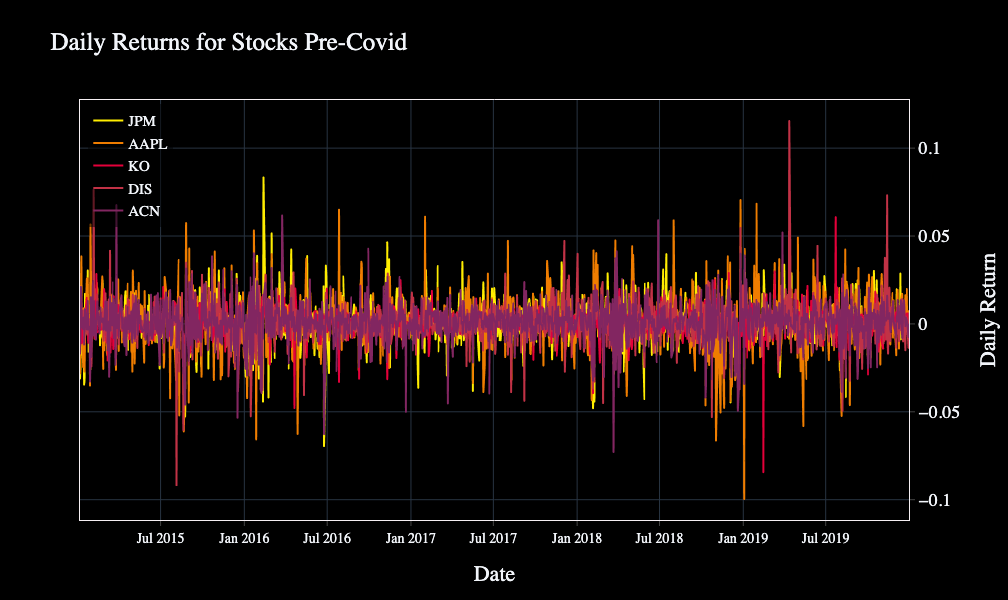

In [132]:
# Calculate daily returns Pre-Covid
stocks_precovid_returns = stocks_precovid.pct_change()
stocks_precovid_returns.dropna(inplace=True)

#Plot of Precovid Daily Returns
px.line(stocks_precovid_returns, 
        labels={'variable' : '', 'value' : 'Daily Return', 'date' : 'Date'},
        height=600, width=1000,
        title='Daily Returns for Stocks Pre-Covid')

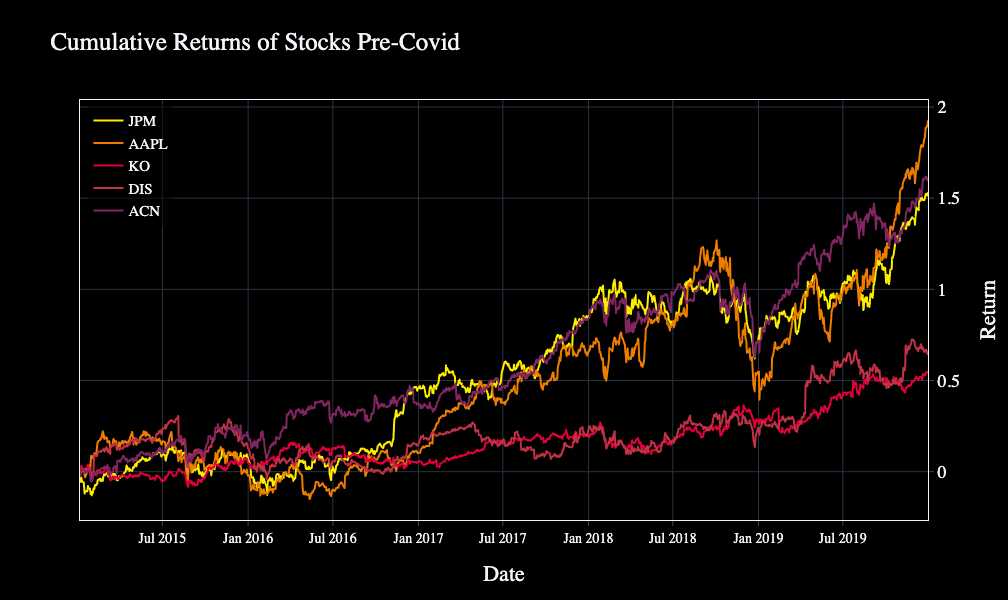

In [133]:
# Calculate and Plot cumulative returns of stocks
stocks_precovid_cum_returns = (1 + stocks_precovid_returns).cumprod() - 1

px.line(stocks_precovid_cum_returns, 
        labels={'variable' : '', 'value' : 'Return', 'date' : 'Date'},
        height=600, width=1000,
        title='Cumulative Returns of Stocks Pre-Covid')

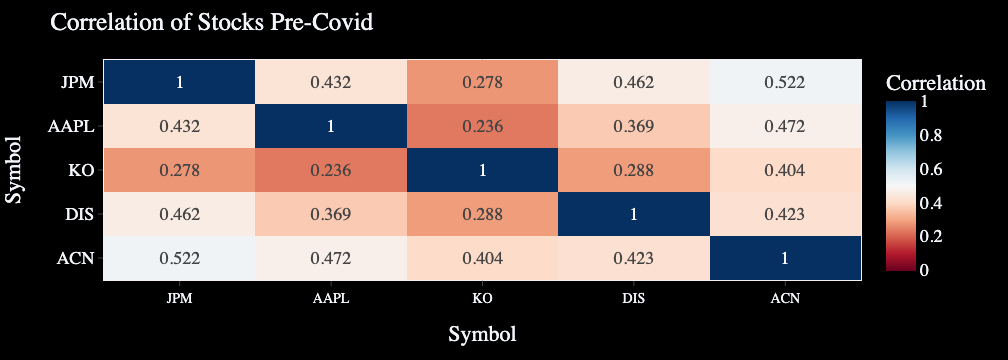

In [136]:
#Calculate and Plot Correlation of stocks  pre-covid
stocks_precovid_corr = round(stocks_precovid_returns.corr(), 3)

px.imshow(stocks_precovid_corr, text_auto=True, aspect="auto", color_continuous_scale='RdBu', range_color=[0,1],
         labels={'x':'Symbol', 'y':'Symbol','color':'Correlation'}).update_yaxes(side="left").update_layout(title_text='Correlation of Stocks Pre-Covid')


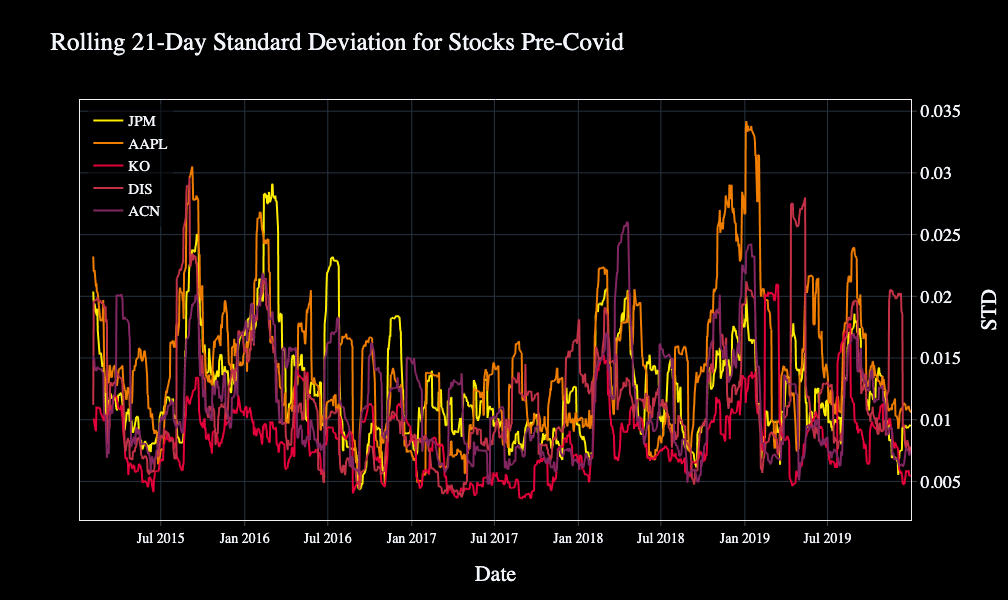

In [137]:
#Calculate Covid Standard Deviation
stocks_precovid_std = stocks_precovid_returns.std()*np.sqrt(252)

# Calculate Rolling standard deviation for stocks using a 21-day window
stocks_precovid_roll_std = stocks_precovid_returns.rolling(window=21).std()

#Plot the rolling standard deviation
px.line(stocks_precovid_roll_std,
        height=600, width=1000,
        labels={'variable' : '', 'value' : 'STD', 'date' : 'Date'},
        title='Rolling 21-Day Standard Deviation for Stocks Pre-Covid')

# COVID January 1, 2020 to December 31, 2021

In [138]:
#import ticker data for Covid timeline
JPM_covid = openbb.stocks.load('JPM', start_date='2020-01-01', end_date='2021-12-31')
AAPL_covid = openbb.stocks.load('AAPL', start_date='2020-01-01', end_date='2021-12-31')
KO_covid = openbb.stocks.load('KO', start_date='2020-01-01', end_date='2021-12-31')
DIS_covid = openbb.stocks.load('DIS', start_date='2020-01-01', end_date='2021-12-31')
ACN_covid = openbb.stocks.load('ACN', start_date='2020-01-01', end_date='2021-12-31')

#extract adjusted close for each ticker
JPM_covid = JPM_covid['Adj Close']
AAPL_covid = AAPL_covid['Adj Close']
KO_covid = KO_covid['Adj Close']
DIS_covid = DIS_covid['Adj Close']
ACN_covid = ACN_covid['Adj Close']

#combine dataframes and rename columns
stocks_covid = pd.concat([JPM_covid, AAPL_covid, KO_covid, DIS_covid, ACN_covid], axis=1, join='inner')
stocks_covid = stocks_covid.set_axis(stock_names, axis=1)

Loading Daily data for JPM with starting period 2020-01-02.

Loading Daily data for AAPL with starting period 2020-01-02.

Loading Daily data for KO with starting period 2020-01-02.

Loading Daily data for DIS with starting period 2020-01-02.

Loading Daily data for ACN with starting period 2020-01-02.

In [9]:
# Display the highest and lowest prices for each stock
print(f"JPM High of ${round(JPM_covid.max(), 2)} on {stocks_covid.idxmax().loc['JPM'].strftime('%b %d %Y')} --- JPM Low of ${round(JPM_covid.min(), 2)} on {stocks_covid.idxmin().loc['JPM'].strftime('%b %d %Y')}") 
print(f"AAPL High of ${round(AAPL_covid.max(), 2)} on {stocks_covid.idxmax().loc['AAPL'].strftime('%b %d %Y')} --- AAPL Low of ${round(AAPL_covid.min(), 2)} on {stocks_covid.idxmin().loc['AAPL'].strftime('%b %d %Y')}") 
print(f"KO High of ${round(KO_covid.max(), 2)} on {stocks_covid.idxmax().loc['KO'].strftime('%b %d %Y')} --- KO Low of ${round(KO_covid.min(), 2)} on {stocks_covid.idxmin().loc['KO'].strftime('%b %d %Y')}") 
print(f"DIS High of ${round(DIS_covid.max(), 2)} on {stocks_covid.idxmax().loc['DIS'].strftime('%b %d %Y')} --- DIS Low of ${round(DIS_covid.min(), 2)} on {stocks_covid.idxmin().loc['DIS'].strftime('%b %d %Y')}") 
print(f"ACN High of ${round(ACN_covid.max(), 2)} on {stocks_covid.idxmax().loc['ACN'].strftime('%b %d %Y')} --- ACN Low of ${round(ACN_covid.min(), 2)} on {stocks_covid.idxmin().loc['ACN'].strftime('%b %d %Y')}") 


JPM High of $161.7 on Oct 22 2021 --- JPM Low of $70.48 on Mar 23 2020
AAPL High of $178.29 on Dec 27 2021 --- AAPL Low of $54.78 on Mar 23 2020
KO High of $55.75 on Dec 31 2021 --- KO Low of $33.44 on Mar 23 2020
DIS High of $201.91 on Mar 08 2021 --- DIS Low of $85.76 on Mar 23 2020
ACN High of $403.42 on Dec 29 2021 --- ACN Low of $136.18 on Mar 23 2020


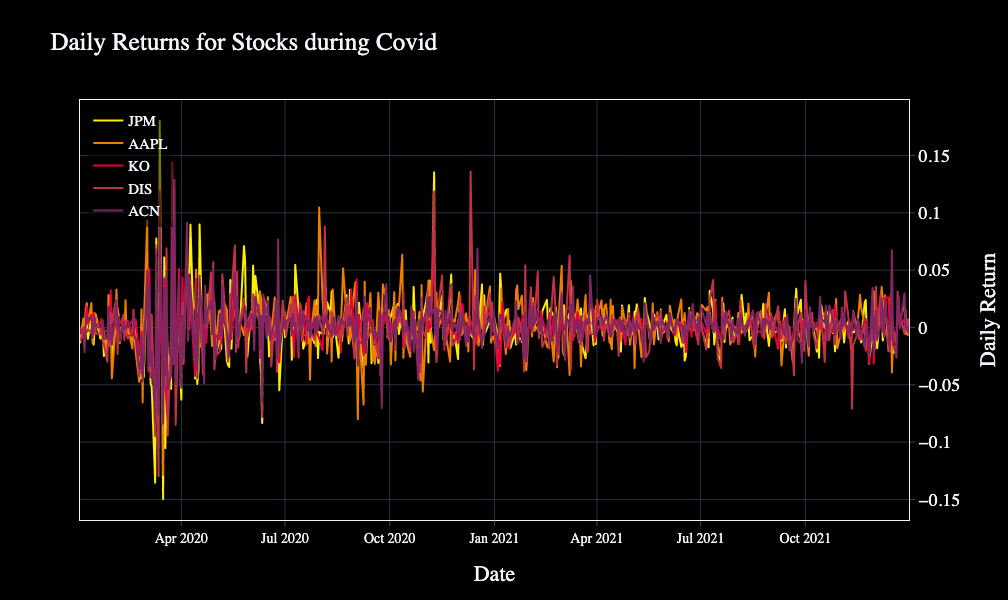

In [139]:
# Calculate daily returns during Covid
stocks_covid_returns = stocks_covid.pct_change()
stocks_covid_returns.dropna(inplace=True)

#Plot of during` Daily Returns
px.line(stocks_covid_returns, 
        labels={'variable' : '', 'value' : 'Daily Return', 'date' : 'Date'},
        height=600, width=1000,
        title='Daily Returns for Stocks during Covid')

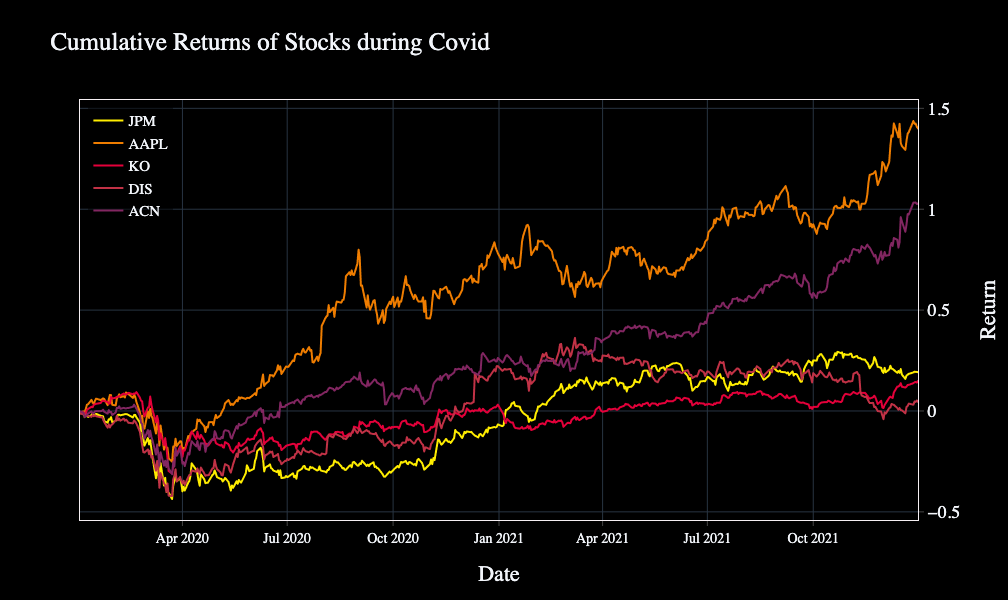

In [140]:
# Calculate and Plot cumulative returns of stocks during covid
stocks_covid_cum_returns = (1 + stocks_covid_returns).cumprod() - 1

px.line(stocks_covid_cum_returns, 
        labels={'variable' : '', 'value' : 'Return', 'date' : 'Date'},
        height=600, width=1000,
        title='Cumulative Returns of Stocks during Covid')


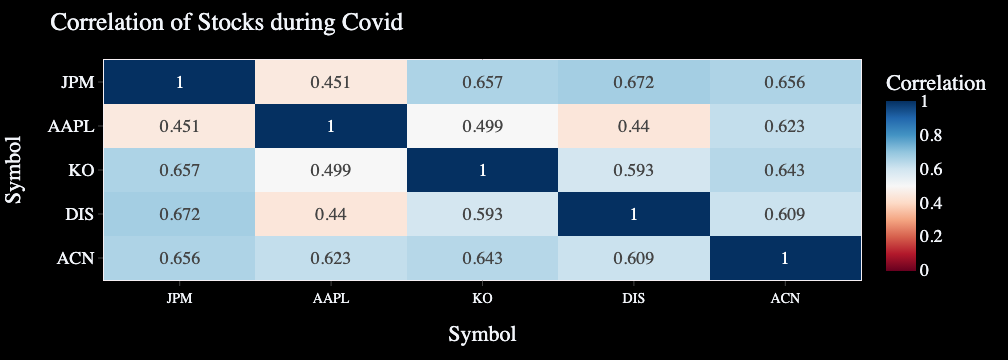

In [111]:
#Calculate and Plot Correlation of stock during covid
stocks_covid_corr = round(stocks_covid_returns.corr(), 3)

px.imshow(stocks_covid_corr, text_auto=True, aspect="auto", color_continuous_scale='RdBu', range_color=[0,1],
         labels={'x':'Symbol', 'y':'Symbol','color':'Correlation'}).update_yaxes(side="left").update_layout(title_text='Correlation of Stocks during Covid')


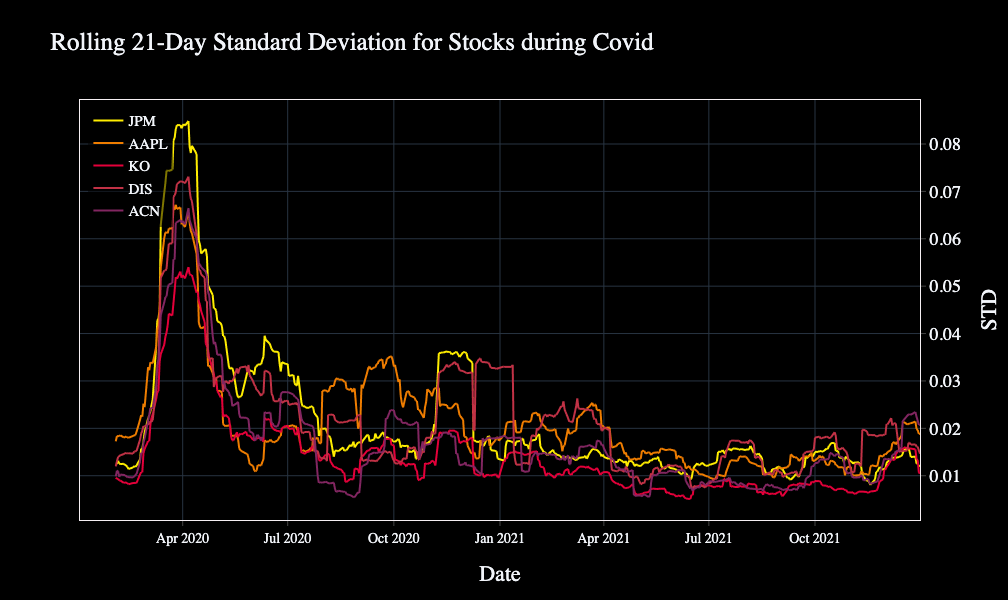

In [141]:
#Calculate Covid Standard Deviation
stocks_covid_std = stocks_covid_returns.std()*np.sqrt(252)

# Calculate Rolling standard deviation for stocks using a 21-day window
stocks_covid_roll_std = stocks_covid_returns.rolling(window=21).std()

#Plot the rolling standard deviation
px.line(stocks_covid_roll_std,
        height=600, width=1000,
        labels={'variable' : '', 'value' : 'STD', 'date' : 'Date'},
        title='Rolling 21-Day Standard Deviation for Stocks during Covid')

# Post-COVID January 1, 2022 to September 31, 2023

In [142]:
#import ticker data for Covid timeline
JPM_postcovid = openbb.stocks.load('JPM', start_date='2022-01-01', end_date='2023-09-30')
AAPL_postcovid = openbb.stocks.load('AAPL', start_date='2022-01-01', end_date='2023-09-30')
KO_postcovid = openbb.stocks.load('KO', start_date='2022-01-01', end_date='2023-09-30')
DIS_postcovid = openbb.stocks.load('DIS', start_date='2022-01-01', end_date='2023-09-30')
ACN_postcovid = openbb.stocks.load('ACN', start_date='2022-01-01', end_date='2023-09-30')

#extract adjusted close for each ticker
JPM_postcovid = JPM_postcovid['Adj Close']
AAPL_postcovid = AAPL_postcovid['Adj Close']
KO_postcovid = KO_postcovid['Adj Close']
DIS_postcovid = DIS_postcovid['Adj Close']
ACN_postcovid = ACN_postcovid['Adj Close']

#combine dataframes and rename columns
stocks_postcovid = pd.concat([JPM_postcovid, AAPL_postcovid, KO_postcovid, DIS_postcovid, ACN_postcovid], axis=1, join='inner')
stocks_postcovid = stocks_postcovid.set_axis(stock_names, axis=1)

Loading Daily data for JPM with starting period 2022-01-03.

Loading Daily data for AAPL with starting period 2022-01-03.

Loading Daily data for KO with starting period 2022-01-03.

Loading Daily data for DIS with starting period 2022-01-03.

Loading Daily data for ACN with starting period 2022-01-03.

In [13]:
# Display the highest and lowest prices for each stock
print(f"JPM High of ${round(JPM_postcovid.max(), 2)} on {stocks_postcovid.idxmax().loc['JPM'].strftime('%b %d %Y')} --- JPM Low of ${round(JPM_postcovid.min(), 2)} on {stocks_postcovid.idxmin().loc['JPM'].strftime('%b %d %Y')}") 
print(f"AAPL High of ${round(AAPL_postcovid.max(), 2)} on {stocks_postcovid.idxmax().loc['AAPL'].strftime('%b %d %Y')} --- AAPL Low of ${round(AAPL_postcovid.min(), 2)} on {stocks_postcovid.idxmin().loc['AAPL'].strftime('%b %d %Y')}") 
print(f"KO High of ${round(KO_postcovid.max(), 2)} on {stocks_postcovid.idxmax().loc['KO'].strftime('%b %d %Y')} --- KO Low of ${round(KO_postcovid.min(), 2)} on {stocks_postcovid.idxmin().loc['KO'].strftime('%b %d %Y')}") 
print(f"DIS High of ${round(DIS_postcovid.max(), 2)} on {stocks_postcovid.idxmax().loc['DIS'].strftime('%b %d %Y')} --- DIS Low of ${round(DIS_postcovid.min(), 2)} on {stocks_postcovid.idxmin().loc['DIS'].strftime('%b %d %Y')}") 
print(f"ACN High of ${round(ACN_postcovid.max(), 2)} on {stocks_postcovid.idxmax().loc['ACN'].strftime('%b %d %Y')} --- ACN Low of ${round(ACN_postcovid.min(), 2)} on {stocks_postcovid.idxmin().loc['ACN'].strftime('%b %d %Y')}") 


JPM High of $159.51 on Jan 12 2022 --- JPM Low of $99.01 on Oct 11 2022
AAPL High of $195.93 on Jul 31 2023 --- AAPL Low of $124.33 on Jan 05 2023
KO High of $62.82 on Apr 21 2022 --- KO Low of $52.36 on Oct 10 2022
DIS High of $157.89 on Jan 11 2022 --- DIS Low of $79.9 on Sep 27 2023
ACN High of $395.45 on Jan 03 2022 --- ACN Low of $243.31 on Mar 15 2023


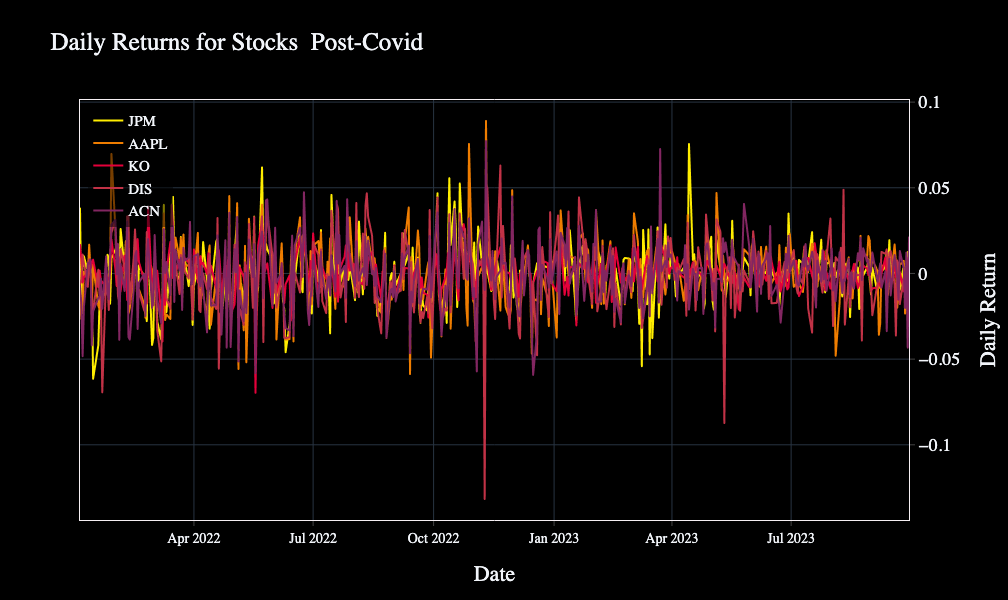

In [143]:
# Calculate daily returns Post-Covid
stocks_postcovid_returns = stocks_postcovid.pct_change()
stocks_postcovid_returns.dropna(inplace=True)

#Plot of Post-covid Daily Returns
px.line(stocks_postcovid_returns, 
        labels={'variable' : '', 'value' : 'Daily Return', 'date' : 'Date'},
        height=600, width=1000,
        title='Daily Returns for Stocks  Post-Covid')

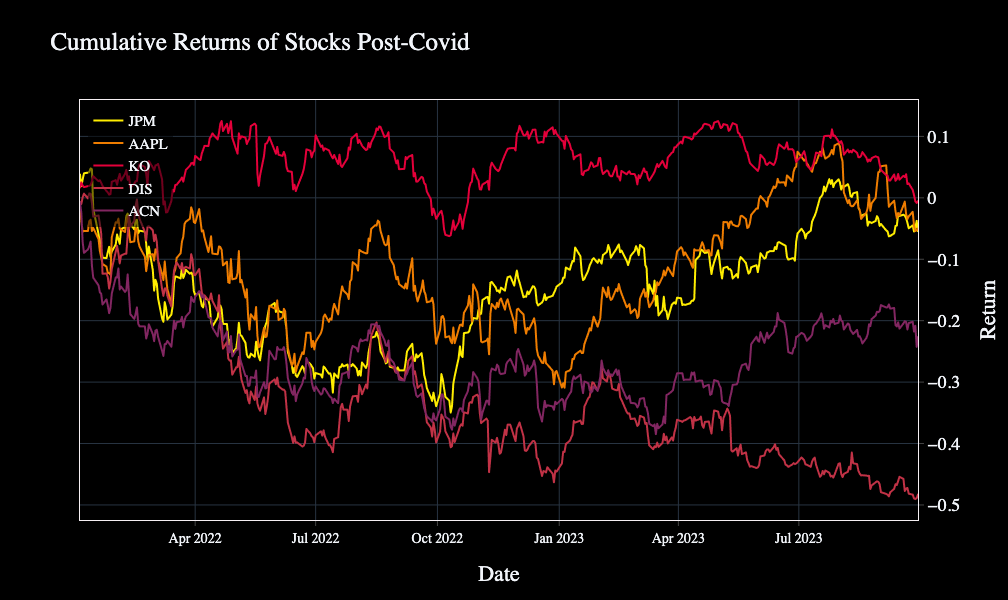

In [144]:
# Calculate and Plot cumulative returns of stocks post covidd
stocks_postcovid_cum_returns = (1 + stocks_postcovid_returns).cumprod() - 1

px.line(stocks_postcovid_cum_returns, 
        labels={'variable' : '', 'value' : 'Return', 'date' : 'Date'},
        height=600, width=1000,
        title='Cumulative Returns of Stocks Post-Covid')

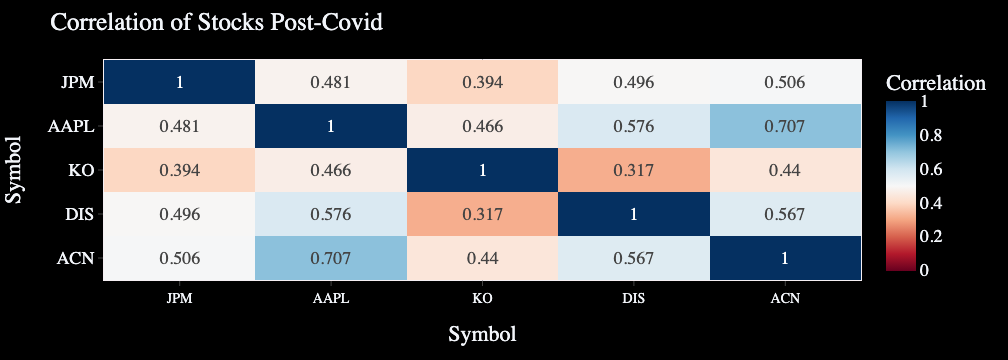

In [110]:
#Calculate and Plot Correlation of stock post covid
stocks_postcovid_corr = round(stocks_postcovid_returns.corr(), 3)

px.imshow(stocks_postcovid_corr, text_auto=True, aspect="auto", color_continuous_scale='RdBu', range_color=[0,1],
          labels={'x':'Symbol', 'y':'Symbol','color':'Correlation'}).update_yaxes(side="left").update_layout(title_text='Correlation of Stocks Post-Covid')


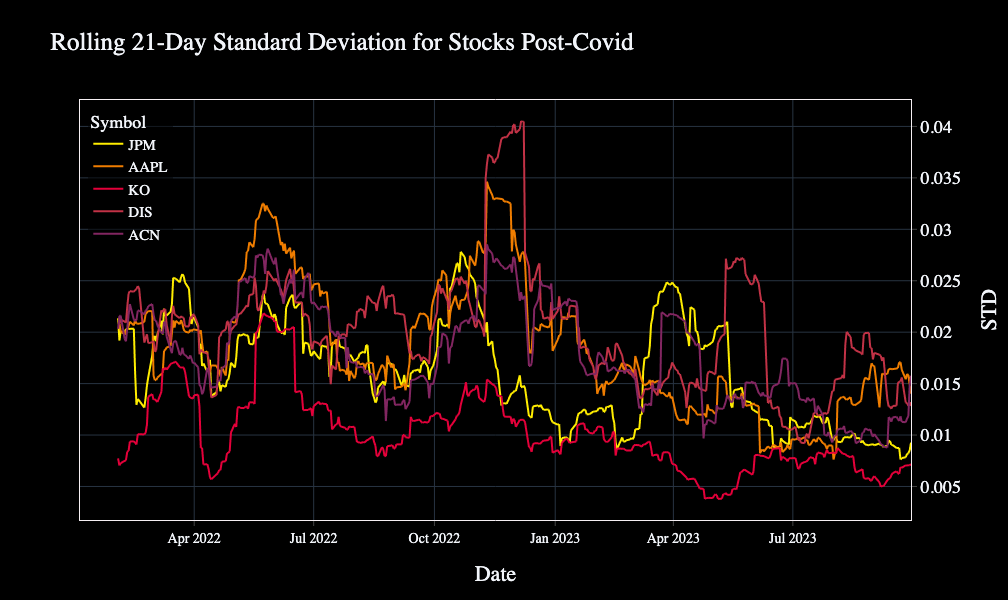

In [122]:
#Calculate Post Covid Standard Deviation
stocks_postcovid_std = stocks_postcovid_returns.std()*np.sqrt(252)

# Calculate Rolling standard deviation for stocks using a 21-day window
stocks_postcovid_roll_std = stocks_postcovid_returns.rolling(window=21).std()

# Plot the rolling standard deviation
px.line(stocks_postcovid_roll_std,
        height=600, width=1000,
        labels={'variable' : 'Symbol', 'value' : 'STD', 'date' : 'Date'},
        title='Rolling 21-Day Standard Deviation for Stocks Post-Covid')